# **Problem Definition¶**

*   How to recognize handwritten digits



## **Data**

The MNIST database (link) has a database of handwritten digits.

The training set has 60K samples. The test set has 10K samples.

The digits are size-normalized and centered in a fixed-size image.

## **Load the data**

The data is available in the repo's data folder. Let's load that using the keras library. For now, let's load the data and see how it looks.

We will look into keras a little while later.

In [1]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving mnist.pkl.gz to mnist.pkl.gz
User uploaded file "mnist.pkl.gz" with length 11490434 bytes


In [0]:
import numpy as np
import keras
from keras.datasets import mnist

In [0]:
# Set the full path to mnist.pkl.gz
# Point this to the data folder inside the repository
path_to_dataset = "mnist.pkl.gz"

In [0]:
# Load the datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data(path_to_dataset)

In [33]:
# What is the type of X_train?
type(X_train)

numpy.ndarray

In [34]:
# What is the type of y_train #
type(y_train)

numpy.ndarray

In [35]:
# Find number of observations in training data
len(X_train)

60000

In [36]:
# Find number of observations in test data
len(X_test)

10000

In [37]:
# Display first 2 records of X_train
print(X_train[0:2,])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [38]:
# Display the first 10 records of y_train
y_train[0:10,]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [39]:
print(y_train.shape)

(60000,)


In [40]:
# Find the number of observations for digits 2 & 3 in the y_train dataset 
print(len(y_train[np.where(y_train == 2.)[0]]))
print(len(y_train[np.where(y_train == 3.)[0]]))

5958
6131


In [0]:
map_output = map(lambda x: x*2, [1, 2, 3, 4])

In [42]:
# Find the number of observations for digits 2 & 3 in the y_test dataset 
print(len(y_test[np.where(y_test == 2.)[0]]))
print(len(y_test[np.where(y_test == 3.)[0]]))

1032
1010


In [43]:
# What is the dimension of X_train?. What does that mean?
X_train.shape

(60000, 28, 28)

**Display Images**

Let's now display some of the images and see how they look

We will be using matplotlib library for displaying the image

In [0]:
from matplotlib import pyplot
import matplotlib as mpl
%matplotlib inline

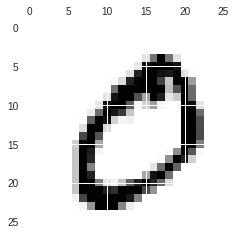

In [45]:
# Displaying the first training data
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
imgplot = ax.imshow(X_train[1], cmap=mpl.cm.Greys)
imgplot.set_interpolation('nearest')
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
pyplot.show()

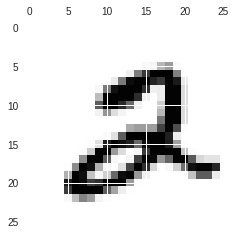

In [21]:
# Let's now display the 5th record
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
imgplot = ax.imshow(X_train[5], cmap=mpl.cm.Greys)
imgplot.set_interpolation('nearest')
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
pyplot.show()

In [49]:
!ls


mnist.pkl.gz


# **Implementing ANN for MNIST**

Code Courtesy : Nielsen (Author - NeuralNetworksandDeepLearning)

In [0]:
# Import libraries
import random
import numpy as np
import keras
from keras.datasets import mnist

In [0]:
# Set the full path to mnist.pkl.gz
# Point this to the data folder inside the repository
path_to_dataset = "mnist.pkl.gz"

In [0]:
# Load the datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data(path_to_dataset)

In [0]:
"""
network.py
~~~~~~~~~~
A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""

#### Libraries
# Standard library
import random

# Third-party libraries
import numpy as np

class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        training_data = list(training_data)
        test_data = list(test_data)
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print( "Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), n_test))
            else:
                print( "Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [0]:
def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [0]:
net = Network([784, 30, 10])


In [0]:
training_inputs = [np.reshape(x, (784, 1)) for x in X_train.copy()]
training_results = [vectorized_result(y) for y in y_train.copy()]
training_data = zip(training_inputs, training_results)

In [0]:
test_inputs = [np.reshape(x, (784, 1)) for x in X_test.copy()]
test_data = zip(test_inputs, y_test.copy())

In [58]:
net.SGD(training_data, 10, 10, 3.0, test_data=test_data)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:137: RuntimeWarning: overflow encountered in exp


Epoch 0: 2847 / 10000
Epoch 1: 2378 / 10000
Epoch 2: 2766 / 10000
Epoch 3: 3012 / 10000
Epoch 4: 3407 / 10000
Epoch 5: 3012 / 10000
Epoch 6: 3224 / 10000
Epoch 7: 1952 / 10000
Epoch 8: 2056 / 10000
Epoch 9: 2125 / 10000


In [59]:
net = Network([784, 10, 10])

training_inputs = [np.reshape(x, (784, 1)) for x in X_train.copy()]
training_results = [vectorized_result(y) for y in y_train.copy()]
training_data = zip(training_inputs, training_results)

test_inputs = [np.reshape(x, (784, 1)) for x in X_test.copy()]
test_data = zip(test_inputs, y_test.copy())

net.SGD(training_data, 10, 10, 1.0, test_data=test_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:137: RuntimeWarning: overflow encountered in exp


Epoch 0: 1918 / 10000
Epoch 1: 1664 / 10000
Epoch 2: 1985 / 10000
Epoch 3: 2080 / 10000
Epoch 4: 1984 / 10000
Epoch 5: 1889 / 10000
Epoch 6: 2111 / 10000
Epoch 7: 2013 / 10000
Epoch 8: 1857 / 10000
Epoch 9: 2038 / 10000


In [60]:
!ls

mnist.pkl.gz
